In [1]:
%autosave 30

Autosaving every 30 seconds


In [2]:
!pip install torch
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 4.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 11.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 22.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 5.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 7.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 28.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 29.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 12.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 20.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━

In [3]:
!nvidia-smi 

Sat Apr  1 18:45:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.108.03   Driver Version: 510.108.03   CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:1B:00.0 Off |                  Off |
|  0%   40C    P8    26W / 460W |      8MiB / 24564MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:1C:00.0 Off |                  N/A |
| 27%   

In [4]:
from get_cuda_device import get_cuda_command

get_cuda_command('cuda:0')

'os.environ["CUDA_VISIBLE_DEVICES"]="0"'

In [5]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [6]:
import torch 

if torch.cuda.is_available():
    device='cuda'
    print('GPU')
else:
    device='cpu'
    print('CPU')
    
    
SEED = 0
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

GPU


# Batch predict

# Generation
Each framework has a generate method for text generation implemented in their respective GenerationMixin class:

PyTorch generate() is implemented in GenerationMixin.
https://huggingface.co/docs/transformers/main/en/main_classes/text_generation

## Parameters that control the length of the output

**max_length (int, optional, defaults to 20)** — The maximum length the generated tokens can have. Corresponds to the length of the input prompt + max_new_tokens. Its effect is overridden by max_new_tokens, if also set.

**max_new_tokens (int, optional)** — The maximum numbers of tokens to generate, ignoring the number of tokens in the prompt.

**min_length (int, optional, defaults to 0)** — The minimum length of the sequence to be generated. Corresponds to the length of the input prompt + min_new_tokens. Its effect is overridden by min_new_tokens, if also set.

**min_new_tokens (int, optional)** — The minimum numbers of tokens to generate, ignoring the number of tokens in the prompt.

**early_stopping (bool or str, optional, defaults to False)** — Controls the stopping condition for beam-based methods, like beam-search. It accepts the following values: True, where the generation stops as soon as there are num_beams complete candidates; False, where an heuristic is applied and the generation stops when is it very unlikely to find better candidates; "never", where the beam search procedure only stops when there cannot be better candidates (canonical beam search algorithm).

**max_time(float, optional)** — The maximum amount of time you allow the computation to run for in seconds. generation will still finish the current pass after allocated time has been passed.

## Parameters that control the generation strategy used

**do_sample (bool, optional, defaults to False)** — Whether or not to use sampling ; use greedy decoding otherwise.


**num_beams (int, optional, defaults to 1)** — Number of beams for beam search. 1 means no beam search.

**num_beam_groups (int, optional, defaults to 1)** — Number of groups to divide num_beams into in order to ensure diversity among different groups of beams.

**penalty_alpha (float, optional)** — The values balance the model confidence and the degeneration penalty in contrastive search decoding.


**use_cache (bool, optional, defaults to True)** — Whether or not the model should use the past last key/values attentions (if applicable to the model) to speed up decoding.

## Parameters for manipulation of the model output logits

**temperature (float, optional, defaults to 1.0)** — The value used to modulate the next token probabilities.

**top_k (int, optional, defaults to 50)** — The number of highest probability vocabulary tokens to keep for top-k-filtering.

**top_p (float, optional, defaults to 1.0)** — If set to float < 1, only the smallest set of most probable tokens with probabilities that add up to top_p or higher are kept for generation.

**typical_p (float, optional, defaults to 1.0)** — Local typicality measures how similar the conditional probability of predicting a target token next is to the expected conditional probability of predicting a random token next, given the partial text already generated. If set to float < 1, the smallest set of the most locally typical tokens with probabilities that add up to typical_p or higher are kept for generation.


**epsilon_cutoff (float, optional, defaults to 0.0)** — If set to float strictly between 0 and 1, only tokens with a conditional probability greater than epsilon_cutoff will be sampled. In the paper, suggested values range from 3e-4 to 9e-4, depending on the size of the model. 


**eta_cutoff (float, optional, defaults to 0.0)** — Eta sampling is a hybrid of locally typical sampling and epsilon sampling. If set to float strictly between 0 and 1, a token is only considered if it is greater than either eta_cutoff or sqrt(eta_cutoff) * exp(-entropy(softmax(next_token_logits))). The latter term is intuitively the expected next token probability, scaled by sqrt(eta_cutoff). In the paper, suggested values range from 3e-4 to 2e-3, depending on the size of the model. 

**diversity_penalty (float, optional, defaults to 0.0)** — This value is subtracted from a beam’s score if it generates a token same as any beam from other group at a particular time. Note that diversity_penalty is only effective if group beam search is enabled.


**repetition_penalty (float, optional, defaults to 1.0)** — The parameter for repetition penalty. 1.0 means no penalty.


**encoder_repetition_penalty (float, optional, defaults to 1.0)** — The paramater for encoder_repetition_penalty. An exponential penalty on sequences that are not in the original input. 1.0 means no penalty.


**length_penalty (float, optional, defaults to 1.0)** — Exponential penalty to the length that is used with beam-based generation. It is applied as an exponent to the sequence length, which in turn is used to divide the score of the sequence. Since the score is the log likelihood of the sequence (i.e. negative), length_penalty > 0.0 promotes longer sequences, while length_penalty < 0.0 encourages shorter sequences.

**no_repeat_ngram_size (int, optional, defaults to 0)** — If set to int > 0, all ngrams of that size can only occur once.

**bad_words_ids(List[List[int]], optional)** — List of token ids that are not allowed to be generated. In order to get the token ids of the words that should not appear in the generated text, use tokenizer(bad_words, add_prefix_space=True, add_special_tokens=False).input_ids.

**force_words_ids(List[List[int]] or List[List[List[int]]], optional)** — List of token ids that must be generated. If given a List[List[int]], this is treated as a simple list of words that must be included, the opposite to bad_words_ids. If given List[List[List[int]]], this triggers a disjunctive constraint, where one can allow different forms of each word.

**! renormalize_logits (bool, optional, defaults to False)** — Whether to renormalize the logits after applying all the logits processors or warpers (including the custom ones). It’s highly recommended to set this flag to True as the search algorithms suppose the score logits are normalized but some logit processors or warpers break the normalization.

**constraints (List[Constraint], optional)** — Custom constraints that can be added to the generation to ensure that the output will contain the use of certain tokens as defined by Constraint objects, in the most sensible way possible.

**forced_bos_token_id (int, optional, defaults to model.config.forced_bos_token_id)** — The id of the token to force as the first generated token after the decoder_start_token_id. Useful for multilingual models like mBART where the first generated token needs to be the target language token.

**forced_eos_token_id (Union[int, List[int]], optional, defaults to model.config.forced_eos_token_id)** — The id of the token to force as the last generated token when max_length is reached. Optionally, use a list to set multiple end-of-sequence tokens.

**remove_invalid_values (bool, optional, defaults to model.config.remove_invalid_values)** — Whether to remove possible nan and inf outputs of the model to prevent the generation method to crash. Note that using remove_invalid_values can slow down generation.

**exponential_decay_length_penalty (tuple(int, float), optional)** — This Tuple adds an exponentially increasing length penalty, after a certain amount of tokens have been generated. The tuple shall consist of: (start_index, decay_factor) where start_index indicates where penalty starts and decay_factor represents the factor of exponential decay

**suppress_tokens (List[int], optional)** — A list of tokens that will be suppressed at generation. The SupressTokens logit processor will set their log probs to -inf so that they are not sampled.

**begin_suppress_tokens (List[int], optional)** — A list of tokens that will be suppressed at the beginning of the generation. The SupressBeginTokens logit processor will set their log probs to -inf so that they are not sampled.

**forced_decoder_ids (List[List[int]], optional)** — A list of pairs of integers which indicates a mapping from generation indices to token indices that will be forced before sampling. For example, [[1, 123]] means the second generated token will always be a token of index 123.

## Parameters that define the output variables of `generate`

**num_return_sequences(int, optional, defaults to 1)** — The number of independently computed returned sequences for each element in the batch.

**output_attentions (bool, optional, defaults to False)** — Whether or not to return the attentions tensors of all attention layers. 

**output_hidden_states (bool, optional, defaults to False)** — Whether or not to return the hidden states of all layers. 

**output_scores (bool, optional, defaults to False)** — Whether or not to return the prediction scores.

**return_dict_in_generate (bool, optional, defaults to False)** — Whether or not to return a ModelOutput instead of a plain tuple.

## Special tokens that can be used at generation time

**pad_token_id (int, optional)** — The id of the padding token.

**bos_token_id (int, optional)** — The id of the beginning-of-sequence token.

**eos_token_id (Union[int, List[int]], optional)** — The id of the end-of-sequence token. Optionally, use a list to set multiple end-of-sequence tokens.

## Generation parameters exclusive to encoder-decoder models

**encoder_no_repeat_ngram_size (int, optional, defaults to 0)** — If set to int > 0, all ngrams of that size that occur in the encoder_input_ids cannot occur in the decoder_input_ids.

**decoder_start_token_id (int, optional)** — If an encoder-decoder model starts decoding with a different token than bos, the id of that token.

In [7]:
import numpy as np
import torch

from transformers import T5ForConditionalGeneration, AutoTokenizer
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, AutoConfig


from torch.utils.data import Dataset, DataLoader
from transformers import Trainer, TrainingArguments
from transformers.file_utils import cached_property
from typing import Tuple
from sklearn.model_selection import train_test_split
import gc
from tqdm.auto import tqdm, trange


import pandas as pd
from sklearn.utils import shuffle

from collections import Counter
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

# model

In [8]:
from transformers import TrainingArguments, Trainer

model_checkpoint = "t5-large"
model = T5ForConditionalGeneration.from_pretrained(model_checkpoint).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

/opt/conda/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [9]:
class PairsDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __getitem__(self, idx):
        assert idx <= len(self.x['input_ids']), (idx, len(self.x['input_ids']))
        item = {key: val[idx] for key, val in self.x.items()}
        item['decoder_attention_mask'] = self.y['attention_mask'][idx]
        item['labels'] = self.y['input_ids'][idx]
        return item
    
    @property
    def n(self):
        return len(self.x['input_ids'])

    def __len__(self):
        return self.n

In [10]:
from typing import List, Dict, Union

class DataCollatorWithPadding:
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        batch = self.tokenizer.pad(
            features,
            padding=True,
        )
        ybatch = self.tokenizer.pad(
            {'input_ids': batch['labels'], 'attention_mask': batch['decoder_attention_mask']},
            padding=True,
        ) 
        batch['labels'] = ybatch['input_ids']
        batch['decoder_attention_mask'] = ybatch['attention_mask']
        
        return {k: torch.tensor(v) for k, v in batch.items()}

In [11]:
def cleanup():
    gc.collect()
    torch.cuda.empty_cache()
    
cleanup()

# **Read data SemEval2018-Task9**

In [12]:
path = os.getcwd().replace('t5_params', '')

path_data_en = path+"SemEval2018-Task9/training/data/1A.english.training.data.txt"
path_gold_en = path+"SemEval2018-Task9/training/gold/1A.english.training.gold.txt"



train_data_en_data = pd.read_csv(path_data_en, header=None, sep="\t", names=['term', 'relation'])
train_gold_en_data = pd.read_csv(path_gold_en, header=None, names=['hypernym'])

train_data_en_data.head()

,term,relation
0,blackfly,Concept
1,Turonian,Entity
2,abhorrence,Concept
3,tropical storm,Concept
4,militarization,Concept


In [13]:
path_test_data_en = path+"SemEval2018-Task9/test/data/1A.english.test.data.txt"
path_test_gold_en = path+"SemEval2018-Task9/test/gold/1A.english.test.gold.txt"


test_data_en_data = pd.read_csv(path_test_data_en, header=None, sep="\t", names=['term', 'relation'])
test_gold_en_data = pd.read_csv(path_test_gold_en, header=None, names=['hypernym'])

In [14]:
def standard_preprcessing(train_features, train_target, test_features, test_target):
    
    train_data_en = train_features.copy()
    train_data_en = 'hyponym: ' + train_data_en.term + ' | hypernyms:'
    print(train_data_en.head())

    train_gold_en = train_target.copy()
    train_gold_en = train_gold_en.hypernym.str.split('\t').str.join(', ')
    print(train_gold_en.head())
    
    test_data_en = test_features.copy()
    test_data_en = 'hyponym: ' + test_data_en.term + ' | hypernyms:'
    print(test_data_en.head())

    test_gold_en = test_target.copy()
    test_gold_en = test_gold_en.hypernym.str.split('\t').str.join(', ')
    print(test_gold_en.head())
    
    return train_data_en, train_gold_en, test_data_en, test_gold_en


In [15]:
train_data_en, train_gold_en, test_data_en, test_gold_en = standard_preprcessing(train_data_en_data, 
                                                                                 train_gold_en_data, 
                                                                                 test_data_en_data, 
                                                                                 test_gold_en_data)

0          hyponym: blackfly | hypernyms:
1          hyponym: Turonian | hypernyms:
2        hyponym: abhorrence | hypernyms:
3    hyponym: tropical storm | hypernyms:
4    hyponym: militarization | hypernyms:
Name: term, dtype: object
0                           homopterous insect, insect
1    technical specification, geologic timescale, p...
2                      distaste, hatred, hate, disgust
3    atmosphere, windstorm, violent storm, air curr...
4                                       social control
Name: hypernym, dtype: object
0    hyponym: maliciousness | hypernyms:
1          hyponym: buckler | hypernyms:
2        hyponym: spelunker | hypernyms:
3     hyponym: quo warranto | hypernyms:
4     hyponym: Jeff Francis | hypernyms:
Name: term, dtype: object
0       malevolence, distaste, hatred, hate, malignity
1                                           body armor
2                    exploration, adventurer, explorer
3    proceedings, legal proceedings, proceeding, du...
4       

In [16]:
# params = {
#     'no_repeat_ngram_size': 2, 
#     'max_new_tokens': 100,
#     'num_return_sequences': 20, 
#     'num_beams': 20, 
#     'early_stopping': True,
#     'num_beam_groups': 5,
#     'diversity_penalty': 1.0,
#     'top_k':20,
#     'repetition_penalty':0.5
# }

In [17]:
def predict_hyponyms(X, params):

    input_ids = tokenizer.encode(X, return_tensors='pt') # encode

    output_logit = model.generate(input_ids.cuda(), **params) # generation

    decoding = []
    for logit in output_logit:
        decoded_logit = tokenizer.decode(logit, skip_special_tokens=True).split(' ') #decode one logit
        decoding.extend(decoded_logit)
        
    # remove punctuation and hyperonyms/hyponyms
    regexp = re.compile('[A-Za-z]+')
    decoding = [regexp.findall(token)[0] for token in decoding if len(regexp.findall(token)) > 0] 
    
    # remove hyperonym and hyponym
    docoded_results = set([token for token in decoding if token[:4].lower() not in ['hypo', 'hype']])

    return list(docoded_results)

In [18]:
def predict(test_data_en, test_gold_en, params):
    
#   make predictions for each hyponyms
    test_pred_en=[]
    for text in tqdm(test_data_en.tolist()):
        pred_masked_token = predict_hyponyms(text, params)
        test_pred_en.append('\t'.join(pred_masked_token))
            
#   make txt format
    name  = 'prediciton.txt'

    test_pred_en_df = pd.DataFrame(test_pred_en)
    test_pred_en_df.to_csv(name, header=None, index=None)

In [19]:
from std_answers2table import answers
from contextlib import redirect_stdout
import io
from tqdm import tqdm
from IPython.display import clear_output

In [20]:
def plot(param):
    table = pd.read_csv(param+'_params_result_table.csv').set_index(param)
    plt.figure(figsize=(7, 5))
    for metric in table.columns:
        plt.plot(table.index, table[metric], label=metric)

    plt.legend()   
    plt.title(param)
    plt.xlabel(param)
    plt.grid(True)

    plt.show()

In [21]:
def params_predict(param_values: list, name_stretegy):

    main_table = []


    for values in tqdm(param_values):

      # Predict
        predict(test_data_en, test_gold_en, values)

    #   Metrics

        f = io.StringIO()
        with redirect_stdout(f):
            !python scorer.py /home/jovyan/work/SemEval2018-Task9/test/gold/1A.english.test.gold.txt prediciton.txt


        _std_out = f.getvalue()
        _std_out = _std_out  + str(name_stretegy)
        
        _table = answers(_std_out, str(values[name_stretegy]), name_stretegy)
        main_table.append(_table)


        df = pd.concat(main_table)
        df.to_csv(name_stretegy + '_params_result_table.csv')
        clear_output()

## max_length

In [22]:
param_values = [{'max_length':int(i), 'num_beams': 5, 'early_stopping':True} for i in np.linspace(3, 20, 10)]
param_values

[{'max_length': 3, 'num_beams': 5, 'early_stopping': True},
 {'max_length': 4, 'num_beams': 5, 'early_stopping': True},
 {'max_length': 6, 'num_beams': 5, 'early_stopping': True},
 {'max_length': 8, 'num_beams': 5, 'early_stopping': True},
 {'max_length': 10, 'num_beams': 5, 'early_stopping': True},
 {'max_length': 12, 'num_beams': 5, 'early_stopping': True},
 {'max_length': 14, 'num_beams': 5, 'early_stopping': True},
 {'max_length': 16, 'num_beams': 5, 'early_stopping': True},
 {'max_length': 18, 'num_beams': 5, 'early_stopping': True},
 {'max_length': 20, 'num_beams': 5, 'early_stopping': True}]

In [23]:
%%time
params_predict(param_values, 'max_length')

pd.read_csv('max_length_params_result_table.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [1:00:08<00:00, 360.89s/it]

CPU times: user 1h 2s, sys: 8.48 s, total: 1h 11s
Wall time: 1h 8s


,max_length,MRR,MAP,P@1,P@3,P@5,P@15
0,3,0.01667,0.00816,0.01067,0.00933,0.00781,0.00737
1,4,0.02156,0.01001,0.01533,0.01133,0.00940,0.00892
2,6,0.02678,0.01308,0.01667,0.01522,0.01256,0.01188
3,8,0.03611,0.01759,0.02400,0.02033,0.01676,0.01585
4,10,0.03378,0.01714,0.02000,0.02011,0.01660,0.01565
5,12,0.03478,0.01730,0.02200,0.02011,0.01662,0.01570
6,14,0.03511,0.01745,0.02200,0.02033,0.01676,0.01583
7,16,0.03494,0.01739,0.02200,0.02011,0.01676,0.01583
8,18,0.03472,0.01735,0.02200,0.02011,0.01676,0.01583
9,20,0.03500,0.01743,0.02200,0.02033,0.01676,0.01583


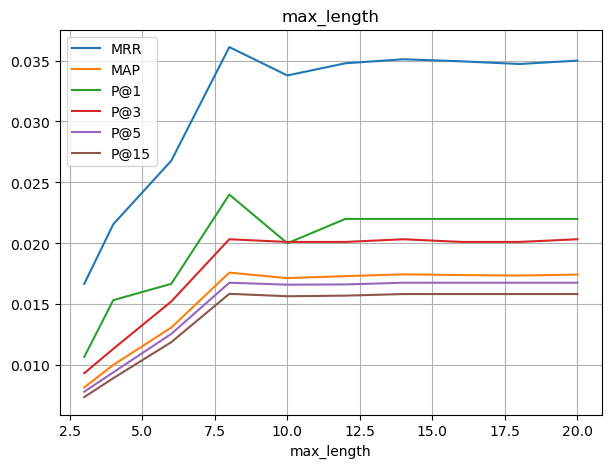

In [25]:
plot('max_length')

## num_beams

In [34]:
param_values = [{'max_length':8, 'num_beams': int(i), 'early_stopping':True} for i in np.linspace(1, 4, 4)]
param_values

[{'max_length': 8, 'num_beams': 1, 'early_stopping': True},
 {'max_length': 8, 'num_beams': 2, 'early_stopping': True},
 {'max_length': 8, 'num_beams': 3, 'early_stopping': True},
 {'max_length': 8, 'num_beams': 4, 'early_stopping': True}]

In [32]:
%%time
params_predict(param_values, 'num_beams')
pd.read_csv('num_beams_params_result_table.csv')

CPU times: user 4.69 ms, sys: 4 µs, total: 4.7 ms
Wall time: 4.09 ms


,num_beams,MRR,MAP,P@1,P@3,P@5,P@15
0,1,0.03111,0.01487,0.02133,0.01700,0.01416,0.01333
1,2,0.04200,0.02062,0.02933,0.02344,0.01961,0.01861
2,3,0.03967,0.01911,0.02667,0.02200,0.01811,0.01721
3,4,0.03811,0.01826,0.02667,0.02089,0.01726,0.01636


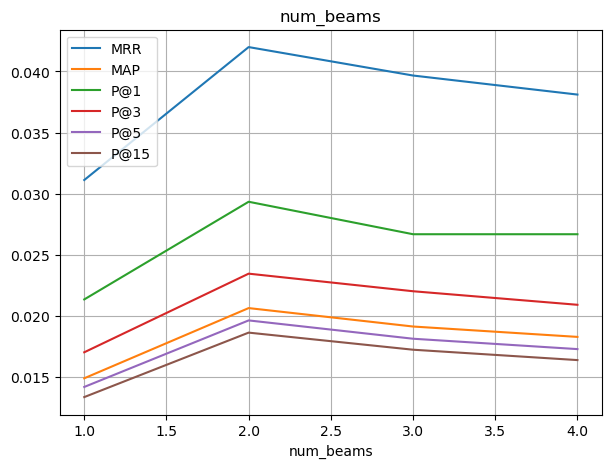

In [33]:
plot('num_beams')

# no_repeat_ngram_size

In [22]:
param_values = [{'max_length':8, 'num_beams': 4, 
                 'no_repeat_ngram_size':int(i), 'early_stopping':True} for i in np.linspace(1, 4, 4)]
param_values

[{'max_length': 8,
  'num_beams': 4,
  'no_repeat_ngram_size': 1,
  'early_stopping': True},
 {'max_length': 8,
  'num_beams': 4,
  'no_repeat_ngram_size': 2,
  'early_stopping': True},
 {'max_length': 8,
  'num_beams': 4,
  'no_repeat_ngram_size': 3,
  'early_stopping': True},
 {'max_length': 8,
  'num_beams': 4,
  'no_repeat_ngram_size': 4,
  'early_stopping': True}]

In [26]:
%%time
params_predict(param_values, 'no_repeat_ngram_size')

pd.read_csv('no_repeat_ngram_size_params_result_table.csv')

CPU times: user 5.1 ms, sys: 17 µs, total: 5.12 ms
Wall time: 4.67 ms


,no_repeat_ngram_size,MRR,MAP,P@1,P@3,P@5,P@15
0,1,0.03733,0.01818,0.02600,0.02067,0.01727,0.01639
1,2,0.03733,0.01815,0.02533,0.02089,0.01726,0.01636
2,3,0.03667,0.01796,0.02467,0.02067,0.01712,0.01622
3,4,0.03733,0.01815,0.02533,0.02089,0.01726,0.01636


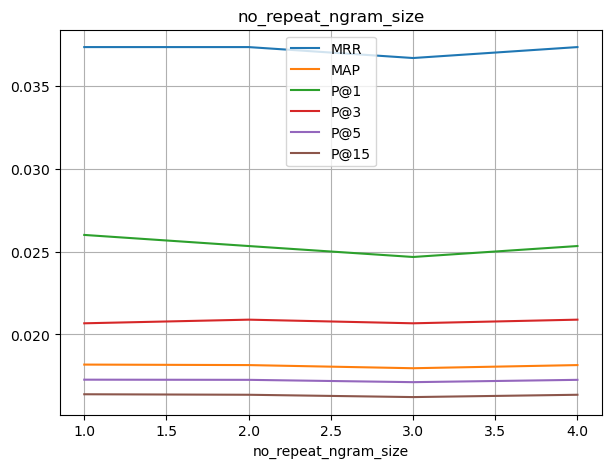

In [27]:
plot('no_repeat_ngram_size')

# num_return_sequences 

In [39]:
cleanup()

In [44]:
param_values = [{'max_length':8, 
                 'num_beams':  int(i), 
                 'num_return_sequences': int(i),
                 'no_repeat_ngram_size': 2, 'early_stopping':True} for i in np.linspace(1, 200, 10)]
param_values = param_values[:5]
param_values

[{'max_length': 8,
  'num_beams': 1,
  'num_return_sequences': 1,
  'no_repeat_ngram_size': 2,
  'early_stopping': True},
 {'max_length': 8,
  'num_beams': 23,
  'num_return_sequences': 23,
  'no_repeat_ngram_size': 2,
  'early_stopping': True},
 {'max_length': 8,
  'num_beams': 45,
  'num_return_sequences': 45,
  'no_repeat_ngram_size': 2,
  'early_stopping': True},
 {'max_length': 8,
  'num_beams': 67,
  'num_return_sequences': 67,
  'no_repeat_ngram_size': 2,
  'early_stopping': True},
 {'max_length': 8,
  'num_beams': 89,
  'num_return_sequences': 89,
  'no_repeat_ngram_size': 2,
  'early_stopping': True}]

In [43]:
%%time
params_predict(param_values, 'num_return_sequences')

pd.read_csv('num_return_sequences_params_result_table.csv')

CPU times: user 331 µs, sys: 4 ms, total: 4.34 ms
Wall time: 3.58 ms


,num_return_sequences,MRR,MAP,P@1,P@3,P@5,P@15
0,1,0.03200,0.01498,0.02333,0.01700,0.01416,0.01333
1,23,0.05770,0.03985,0.02467,0.02389,0.03127,0.05123
2,45,0.04689,0.03699,0.01467,0.01800,0.02576,0.05847
3,67,0.03751,0.03066,0.00933,0.01422,0.01984,0.05215
4,89,0.03375,0.02649,0.00733,0.01256,0.01650,0.04404


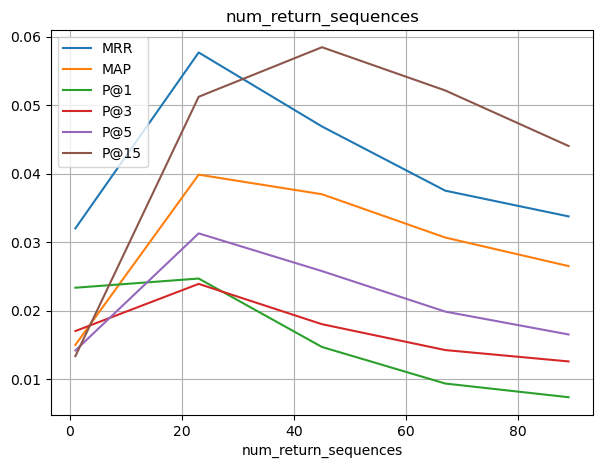

In [45]:
plot('num_return_sequences')

## Sampling

In its most basic form, sampling means randomly picking the next word  w_t according to its conditional probability distribution

In [57]:
param_values = [{'max_length':8, 'num_beams': 2, 'early_stopping':True, 
                 'num_return_sequences':2,
                 
                 'top_k': 0, # deactivate topk
                 'do_sample': x} for x in [True, False]]
param_values

[{'max_length': 8,
  'num_beams': 2,
  'early_stopping': True,
  'num_return_sequences': 2,
  'top_k': 0,
  'do_sample': True},
 {'max_length': 8,
  'num_beams': 2,
  'early_stopping': True,
  'num_return_sequences': 2,
  'top_k': 0,
  'do_sample': False}]

In [58]:
%%time
params_predict(param_values, 'do_sample')

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [10:51<00:00, 325.91s/it]

CPU times: user 10min 50s, sys: 1.63 s, total: 10min 52s
Wall time: 10min 51s


In [60]:
pd.read_csv('do_sample_params_result_table.csv')

,do_sample,MRR,MAP,P@1,P@3,P@5,P@15
0,True,0.04200,0.01973,0.03000,0.02278,0.01868,0.01760
1,False,0.04311,0.02153,0.02933,0.02500,0.02076,0.01958


## temperature

In [77]:
param_values = [{'max_length':8, 
                 'num_beams': 2, 
                 'early_stopping':True,
                 'num_return_sequences':2,
                 'do_sample': True,
                 'top_k':0, 
                 'temperature': i
                } for i in np.linspace(0.1, 1.5, 7)]
param_values

[{'max_length': 8,
  'num_beams': 2,
  'early_stopping': True,
  'num_return_sequences': 2,
  'do_sample': True,
  'top_k': 0,
  'temperature': 0.1},
 {'max_length': 8,
  'num_beams': 2,
  'early_stopping': True,
  'num_return_sequences': 2,
  'do_sample': True,
  'top_k': 0,
  'temperature': 0.3333333333333333},
 {'max_length': 8,
  'num_beams': 2,
  'early_stopping': True,
  'num_return_sequences': 2,
  'do_sample': True,
  'top_k': 0,
  'temperature': 0.5666666666666667},
 {'max_length': 8,
  'num_beams': 2,
  'early_stopping': True,
  'num_return_sequences': 2,
  'do_sample': True,
  'top_k': 0,
  'temperature': 0.7999999999999999},
 {'max_length': 8,
  'num_beams': 2,
  'early_stopping': True,
  'num_return_sequences': 2,
  'do_sample': True,
  'top_k': 0,
  'temperature': 1.0333333333333332},
 {'max_length': 8,
  'num_beams': 2,
  'early_stopping': True,
  'num_return_sequences': 2,
  'do_sample': True,
  'top_k': 0,
  'temperature': 1.2666666666666666},
 {'max_length': 8,
  'num

In [78]:
%%time
params_predict(param_values, 'temperature')

pd.read_csv('temperature_params_result_table.csv')

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [38:36<00:00, 330.99s/it]

CPU times: user 38min 32s, sys: 5.95 s, total: 38min 38s
Wall time: 38min 36s


,temperature,MRR,MAP,P@1,P@3,P@5,P@15
0,0.100000,0.03200,0.01498,0.02333,0.01700,0.01416,0.01333
1,0.333333,0.03200,0.01498,0.02333,0.01700,0.01416,0.01333
2,0.566667,0.03167,0.01477,0.02333,0.01678,0.01393,0.01310
3,0.800000,0.03478,0.01648,0.02467,0.01900,0.01566,0.01472
4,1.033333,0.04128,0.02040,0.02867,0.02367,0.01961,0.01850
5,1.266667,0.03393,0.01968,0.01800,0.02122,0.01951,0.01908
6,1.500000,0.02006,0.01119,0.01000,0.01100,0.01134,0.01131


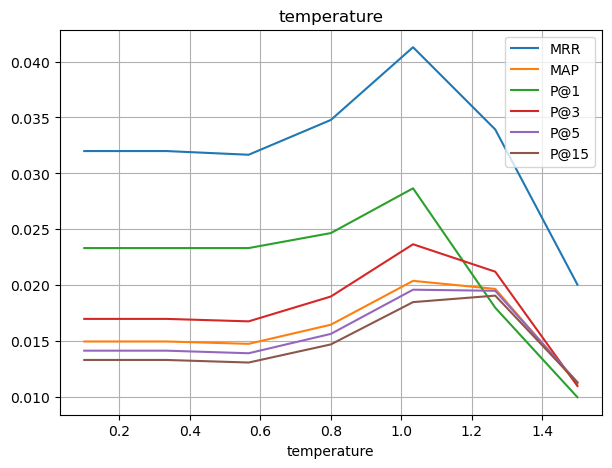

In [79]:
plot('temperature')

## top_p

In [85]:
param_values = [{'max_length':8, 
                 'num_beams': 23, 
                 'num_return_sequences': 23, 
                 'early_stopping':True,
                 'do_sample':True, 
                 'top_k': 10, 
                 'top_p': round(i, 2)
                } for i in np.linspace(0.9, 0.99, 5)]
param_values

[{'max_length': 8,
  'num_beams': 23,
  'num_return_sequences': 23,
  'early_stopping': True,
  'do_sample': True,
  'top_k': 10,
  'top_p': 0.9},
 {'max_length': 8,
  'num_beams': 23,
  'num_return_sequences': 23,
  'early_stopping': True,
  'do_sample': True,
  'top_k': 10,
  'top_p': 0.92},
 {'max_length': 8,
  'num_beams': 23,
  'num_return_sequences': 23,
  'early_stopping': True,
  'do_sample': True,
  'top_k': 10,
  'top_p': 0.94},
 {'max_length': 8,
  'num_beams': 23,
  'num_return_sequences': 23,
  'early_stopping': True,
  'do_sample': True,
  'top_k': 10,
  'top_p': 0.97},
 {'max_length': 8,
  'num_beams': 23,
  'num_return_sequences': 23,
  'early_stopping': True,
  'do_sample': True,
  'top_k': 10,
  'top_p': 0.99}]

In [86]:
%%time
params_predict(param_values, 'top_p')

pd.read_csv('top_p_params_result_table.csv')

100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [1:12:14<00:00, 866.86s/it]

CPU times: user 1h 12min 10s, sys: 5.66 s, total: 1h 12min 15s
Wall time: 1h 12min 14s


,top_p,MRR,MAP,P@1,P@3,P@5,P@15
0,0.90,0.04144,0.02015,0.02933,0.02311,0.01921,0.01811
1,0.92,0.04189,0.02031,0.02933,0.02333,0.01934,0.01822
2,0.94,0.04222,0.02048,0.02933,0.02356,0.01951,0.01839
3,0.97,0.04289,0.02106,0.02933,0.02433,0.02011,0.01899
4,0.99,0.04256,0.02075,0.02933,0.02400,0.01978,0.01865


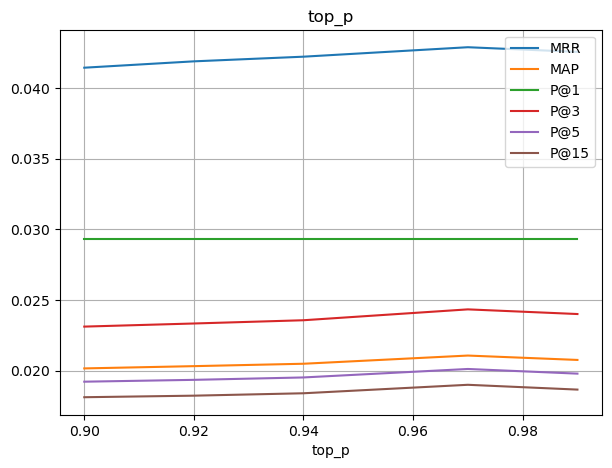

In [88]:
plot('top_p')